### TASK 1
- Name    : Bq Desy Hardianti
- Subject : Statistical Market Research

In [73]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.stats as stats

In [74]:
df = pd.read_excel('task1.xlsx')

In [75]:
df.head()

,No,valure of sales 2015,valure of sales 2019
0,1,76.523084,57.294400
1,2,35.633224,85.577581
2,3,1.323998,17.424832
3,4,75.863565,16.559197
4,5,60.090929,40.271327


<AxesSubplot:>

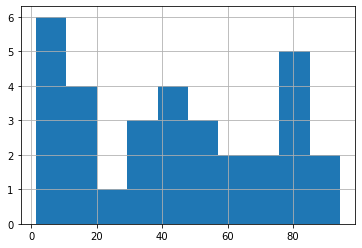

In [76]:
df['valure of sales 2015'].hist()

<AxesSubplot:>

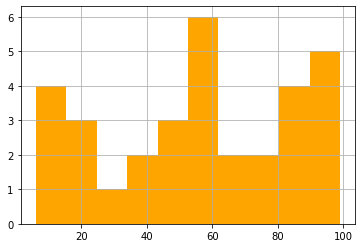

In [77]:
df['valure of sales 2019'].hist(color='orange')

### LOOKING AT THE PERCENTILES
We want to look at the different distributions according to quartiles or chunks of rouhly 20% of the data in order.

To do that, I will sort the values of sales and break them into 5 sized group

In [78]:
#Sort data 2015
df['valure of sales 2015'].sort_values()

2      1.323998
16     2.868126
7      4.810172
9      6.862162
14     9.816658
13    10.261478
22    13.058723
27    13.536085
24    17.117302
6     17.440864
28    27.012682
17    32.969804
1     35.633224
8     35.934387
15    39.389270
31    40.809445
20    46.840854
30    46.843175
19    49.424638
18    49.613665
29    50.885452
4     60.090929
23    61.533835
21    66.910108
12    72.113825
3     75.863565
0     76.523084
26    77.958136
10    78.704876
11    82.312696
5     86.664264
25    94.404166
Name: valure of sales 2015, dtype: float64

In [79]:
#Sort data 2019
df['valure of sales 2019'].sort_values()

11     6.085009
26     7.086723
18    10.251106
19    11.954667
3     16.559197
2     17.424832
27    24.590670
22    33.020362
14    39.791001
4     40.271327
7     43.583086
16    49.333936
5     49.504440
20    55.995872
23    57.292351
0     57.294400
9     57.816839
29    60.224714
10    61.129666
6     63.676410
8     67.757831
31    74.542020
12    78.064883
17    83.627765
1     85.577581
24    87.905224
13    89.020762
30    93.920865
25    94.700056
15    95.899358
21    98.738836
28    99.062636
Name: valure of sales 2019, dtype: float64

In [80]:
len(df['valure of sales 2015'])

32

In [81]:
sorted_2015 = df['valure of sales 2015'].sort_values() 

In [82]:
32/5

6.4

In [83]:
#build group
first_Q = sorted_2015[:6].sum()/sorted_2015.sum()
second_Q = sorted_2015[:12].sum()/sorted_2015.sum()
third_Q = sorted_2015[:18].sum()/sorted_2015.sum()
forth_Q = sorted_2015[:24].sum()/sorted_2015.sum()
fifth_Q = sorted_2015.sum()/sorted_2015.sum()

In [84]:
points2015 = [0,first_Q,second_Q,third_Q,forth_Q,fifth_Q]
x=[0, .2, .4, .6, .8, 1.0]

In [85]:
points2015

[0,
 0.0259413730002286,
 0.11337023885624212,
 0.2905227099731326,
 0.5348033995606826,
 1.0]

### The points above mean
- 0,025 or 2,5 % of the values of sales are controlled by 20%
- 0.11337023885624212 of the values of sales are controlled by 40%
- 0.2905227099731326 of the values of sales are controlled by 60%
- 0.5348033995606826 of the values of sales are controlled by 80%
- 1.0 of the values of sales are controlled by 100%

In [86]:
#PLOTTING VALUE OF SALES 2015 

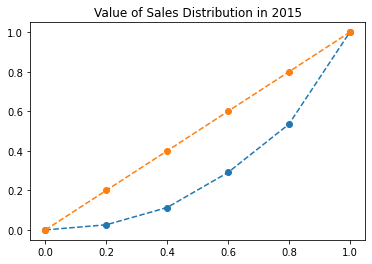

In [87]:
plt.plot(x, points2015, '--o')
plt.plot(x, x, '--o');
plt.title('Value of Sales Distribution in 2015');

### INTERPRETATION OF DATA
Yellow line is the Gini Index Line
Blue line is the Lorenz Curve Line

Now we look at the Gini Index as the ratio of the area between those curve to the area in the triangle

### FITTING THE POLYNOMIAL

We will create a function through the given points. I use numpy to determine the polynomial till we find a goot fit to our real data


In [88]:
# 4th degree polynomial
coefs2015 = np.polyfit(x, points2015, 4)

In [89]:
coefs2015

array([ 1.63478620e+00, -2.42541044e+00,  2.00278164e+00, -2.13960690e-01,
        9.01645152e-04])

In [90]:
# evaluate the polynomial
np.polyval(coefs2015,x)

array([9.01645152e-04, 2.14331472e-02, 1.22386690e-01, 2.81506258e-01,
       5.39311625e-01, 9.99098355e-01])

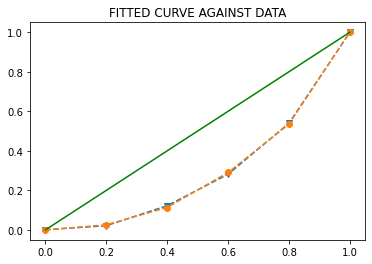

In [91]:
#PLOTTING 2015
plt.plot(x, np.polyval(coefs2015,x),'--v', label ='approximation')
plt.plot(x, points2015, '--o', label = 'data')
plt.plot(x, x,color='green');
plt.title('FITTED CURVE AGAINST DATA');

In [92]:
np.round(coefs2015, decimals =3)

array([ 1.635e+00, -2.425e+00,  2.003e+00, -2.140e-01,  1.000e-03])

We will use a simpler version of the polynomial and check that ot is a reasonable approximation

In [93]:
## LORENZ CURVE 2015
def L(x):
    return 1.63*x**4 -2.425*x**3 + 2.003*x**2 -.214*x

In [94]:
def E(x): return x

In [95]:
x = np.array(x)

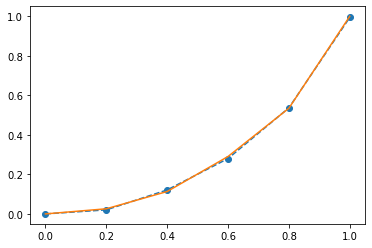

In [96]:
plt.plot(x, L(x), '--o')
plt.plot(x, points2015);

Now we see from the graph above we have function right above our data

## GINI INDEX

to compute the gini index


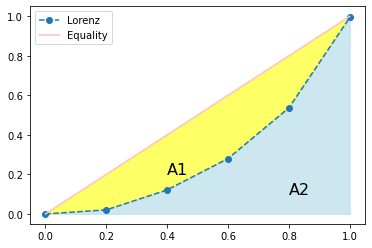

In [97]:
#PLOTTING 2015
plt.plot(x, L(x), '--o', label = 'Lorenz')
plt.plot(x, E(x),color='pink', label='Equality');
plt.fill_between(x, L(x),E(x), color='yellow',alpha=0.6)
plt.fill_between(x, L(x),color='lightblue',alpha=0.6)
plt.text(0.4, 0.2, 'A1',size=16)
plt.text(0.8, 0.1, 'A2',size=16)
plt.legend();

## EVALUATING THE INTEGRAL

In [98]:
#AREA UNDER THE CURVE
from scipy.integrate import quad

In [99]:
def a1(x):
    return E(x) - L(x)

In [100]:
quad(a1,0,1)[0] # let's find the area from 0 to 1

0.21958333333333324

In [101]:
2*quad(a1,0,1)[0]

0.4391666666666665

#### So we get from data Gini index for Value of sales 2015 is 0.4391 or 43,91%.
#### What does this mean that from gini index we get it was pretty equal. The lower the value the more equal distribution

### VALUE OF SALES 2019

In [111]:
#Sort data 2019
df['valure of sales 2019'].sort_values()

11     6.085009
26     7.086723
18    10.251106
19    11.954667
3     16.559197
2     17.424832
27    24.590670
22    33.020362
14    39.791001
4     40.271327
7     43.583086
16    49.333936
5     49.504440
20    55.995872
23    57.292351
0     57.294400
9     57.816839
29    60.224714
10    61.129666
6     63.676410
8     67.757831
31    74.542020
12    78.064883
17    83.627765
1     85.577581
24    87.905224
13    89.020762
30    93.920865
25    94.700056
15    95.899358
21    98.738836
28    99.062636
Name: valure of sales 2019, dtype: float64

In [112]:
len(df['valure of sales 2019'])

32

In [113]:
sorted_2019 = df['valure of sales 2019'].sort_values() 

In [114]:
32/5

6.4

In [115]:
#build group
first_Q1 = sorted_2019[:6].sum()/sorted_2019.sum()
second_Q1 = sorted_2019[:12].sum()/sorted_2019.sum()
third_Q1 = sorted_2019[:18].sum()/sorted_2019.sum()
forth_Q1 = sorted_2019[:24].sum()/sorted_2019.sum()
fifth_Q1 = sorted_2019.sum()/sorted_2019.sum()

In [116]:
points2019 = [0,first_Q1,second_Q1,third_Q1,forth_Q1,fifth_Q1]
x1=[0, .2, .4, .6, .8, 1.0]

In [117]:
points2019

[0,
 0.038285237357523955,
 0.16556338500132603,
 0.3521990261788149,
 0.5888814385018243,
 1.0]

### The points above mean
- 0.0382 or 3,82 % of the values of sales are controlled by 20%
- 0.1655 of the values of sales are controlled by 40%
- 0.352 of the values of sales are controlled by 60%
- 0.588 of the values of sales are controlled by 80%
- 1.0 of the values of sales are controlled by 100%

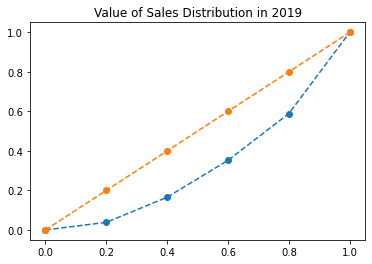

In [118]:
#PLOTTING VALUE OF SALES 2019 
plt.plot(x1, points2019, '--o')
plt.plot(x1, x1, '--o');
plt.title('Value of Sales Distribution in 2019');

### INTERPRETATION OF DATA 2019
Yellow line is the Gini Index Line
Blue line is the Lorenz Curve Line

Now we look at the Gini Index as the ratio of the area between those curve to the area in the triangle

### FITTING THE POLYNOMIAL 2019 VALUE OF SALES

We will create a function through the given points. I use numpy to determine the polynomial till we find a goot fit to our real data


In [119]:
# 4th degree polynomial
coefs2019 = np.polyfit(x1, points2019, 4)

In [120]:
coefs2019

array([ 2.00553118e+00, -3.54892807e+00,  2.79831887e+00, -2.55821786e-01,
        4.49902405e-04])

In [121]:
# evaluate the polynomial
np.polyval(coefs2019,x1)

array([4.49902405e-04, 3.60357253e-02, 1.70062409e-01, 3.47700002e-01,
       5.91130951e-01, 9.99550098e-01])

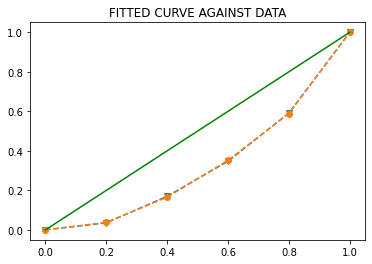

In [122]:
#PLOTTING 2019
plt.plot(x1, np.polyval(coefs2019,x1),'--v', label ='approximation')
plt.plot(x1, points2019, '--o', label = 'data')
plt.plot(x1, x1,color='green');
plt.title('FITTED CURVE AGAINST DATA');

In [123]:
np.round(coefs2019, decimals =3)

array([ 2.006, -3.549,  2.798, -0.256,  0.   ])

In [124]:
## LORENZ CURVE 2019
def L(x1):
    return 2.006*x1**4 -3.549*x1**3 +2.798*x1**2 -.0256*x1

In [125]:
def E(x1): return x1

In [126]:
x1 = np.array(x1)

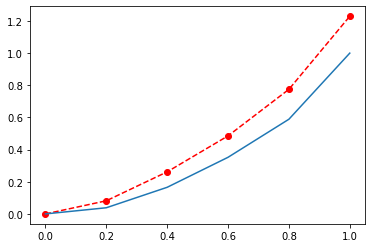

In [127]:
plt.plot(x1, L(x1), '--o', color ='red')
plt.plot(x1, points2019);

Now we see from the graph above, we have function slightly above to our data

### COMPUTE GINI INDEX

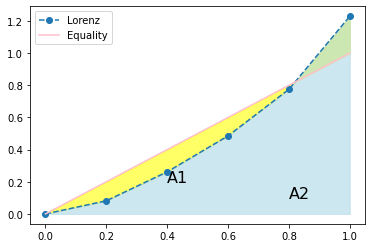

In [129]:
#PLOTTING 2019
plt.plot(x1, L(x1), '--o', label = 'Lorenz')
plt.plot(x1, E(x1),color='pink', label='Equality');
plt.fill_between(x1, L(x1),E(x1), color='yellow',alpha=0.6)
plt.fill_between(x1, L(x1),color='lightblue',alpha=0.6)
plt.text(0.4, 0.2, 'A1',size=16)
plt.text(0.8, 0.1, 'A2',size=16)
plt.legend();

### EVALUATING INTEGRAL

In [130]:
#AREA UNDER THE CURVE
from scipy.integrate import quad

In [131]:
def a2(x1):
    return E(x1) - L(x1)

In [132]:
quad(a2,0,1)[0] # let's find the area from 0 to 1

0.0661833333333333

In [133]:
2*quad(a2,0,1)[0]

0.1323666666666666

#### So we get from data Gini index for Value of sales 2019 is 0.1323 or 13,23%.
#### What does this mean ? From gini index we get it was pretty equal. The lower the value the more equal distribution is.